In [2]:
import pandas as pd

In [4]:
df= pd.read_csv ('titanic.csv')

In [6]:
df.head()

,class,age,sex,survived
0,1st,29.00,female,survived
1,1st,2.00,female,died
2,1st,30.00,male,died
3,1st,25.00,female,died
4,1st,0.92,male,survived


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   class     756 non-null    object 
 1   age       756 non-null    float64
 2   sex       756 non-null    object 
 3   survived  756 non-null    object 
dtypes: float64(1), object(3)
memory usage: 23.8+ KB


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.style.use('ggplot')

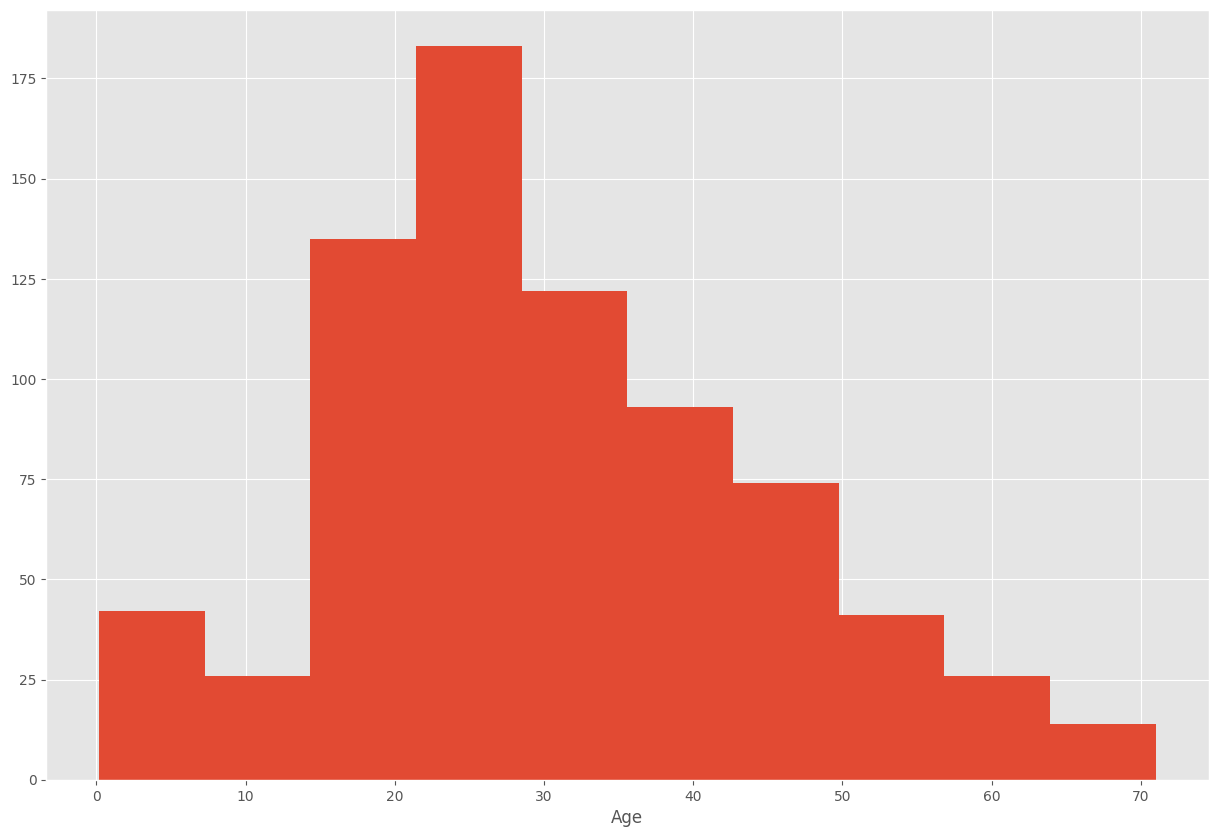

In [14]:
plt.figure (figsize= (15,10))
plt.hist(df.age)
plt.xlabel('Age');


In [16]:
[df[df['sex']=='male'].age, df[df['sex']=='female'].age]

[2      30.00
 4       0.92
 5      47.00
 7      39.00
 9      71.00
        ...  
 751    27.00
 752    26.00
 753    22.00
 754    24.00
 755    29.00
 Name: age, Length: 468, dtype: float64,
 0      29.0
 1       2.0
 3      25.0
 6      63.0
 8      58.0
        ... 
 734    10.0
 736    30.0
 740    14.0
 744    45.0
 750    15.0
 Name: age, Length: 288, dtype: float64]

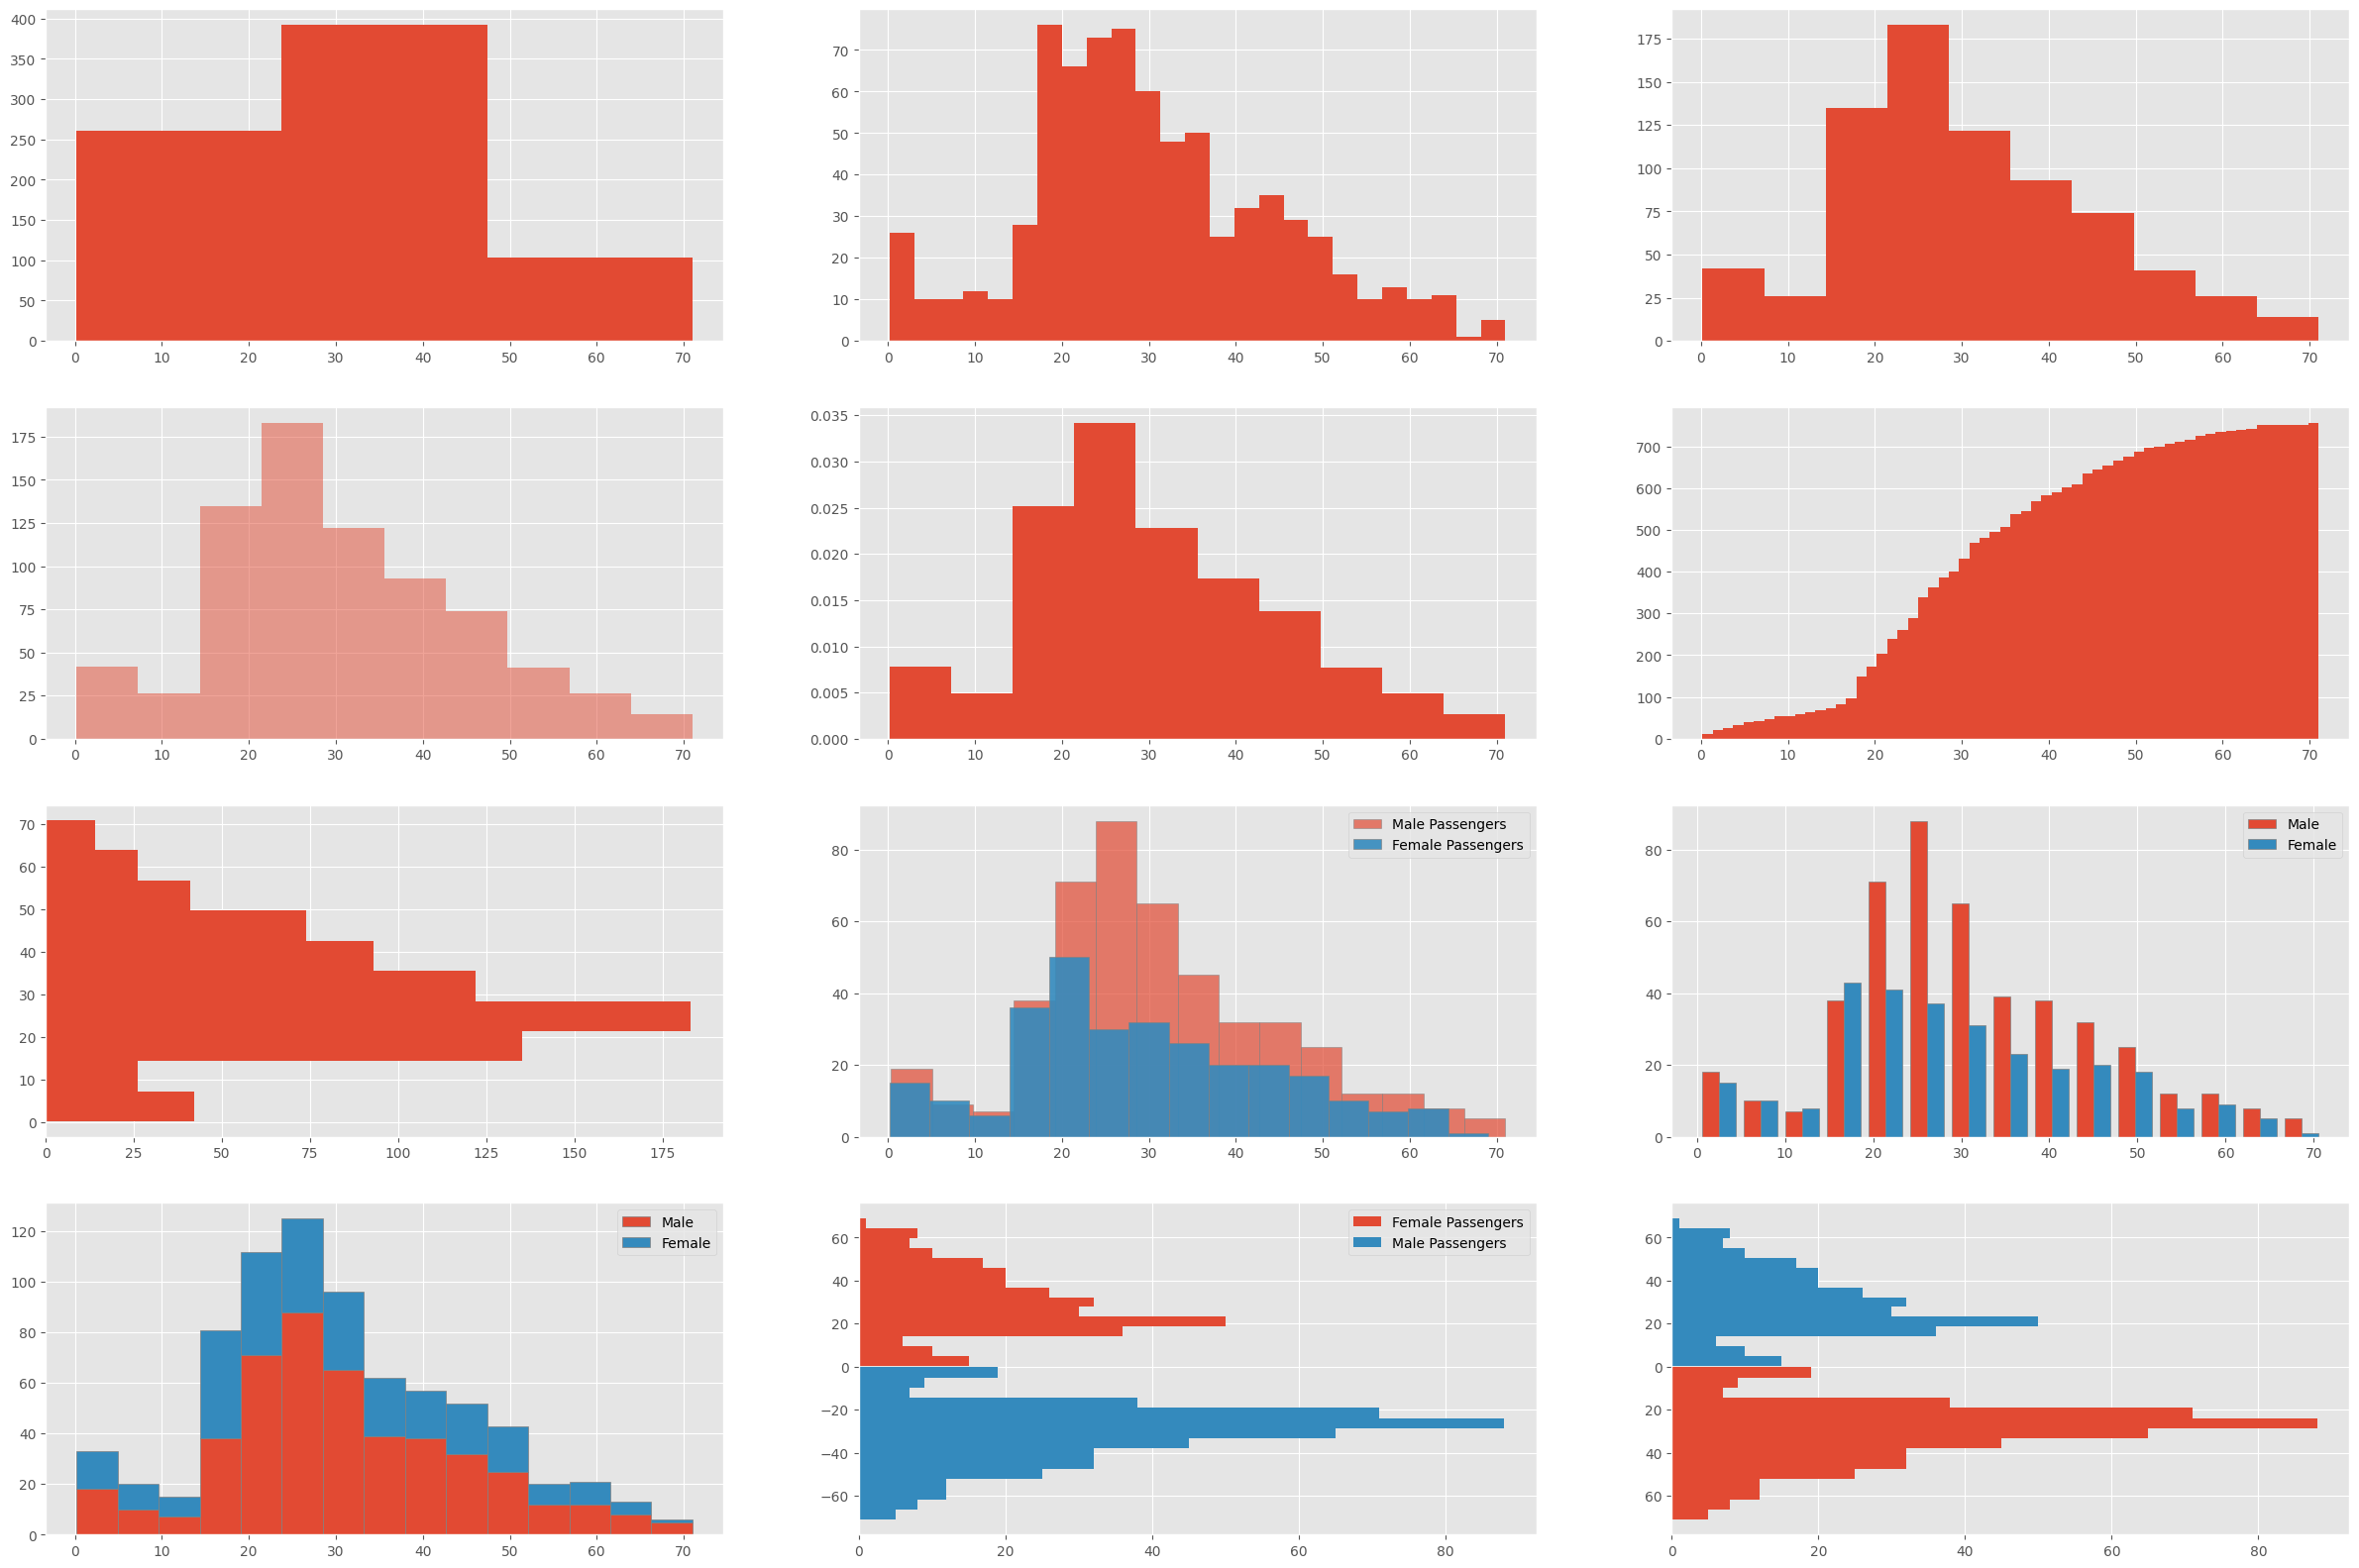

In [18]:
fig, ax = plt.subplots (4,3, figsize= (30,20) )
ax[0,0].hist(df.age, bins= 3)
ax[0,1].hist(df.age, bins= 25)
ax[0,2].hist(df.age, bins = 10)
ax[1,0].hist(df.age, bins = 10, alpha= 0.5)
ax[1,1].hist(df.age, bins = 10, density = True)
ax[1,2].hist(df.age, bins = 60, cumulative = True)
ax[2,0].hist(df.age, bins = 10, orientation= 'horizontal')
ax[2,1].hist(df[df['sex']=='male'].age, bins = 15, alpha = 0.7, edgecolor= 'gray', label = 'Male Passengers')
ax[2,1].hist(df[df['sex']=='female'].age, bins = 15, alpha = 0.9, edgecolor= 'gray', label = 'Female Passengers')
ax[2,2].hist([df[df['sex']=='male'].age, df[df['sex']=='female'].age], bins = 15, edgecolor= 'gray' , stacked= False, label=['Male', 'Female'])
ax[3,0].hist([df[df['sex']=='male'].age, df[df['sex']=='female'].age], bins = 15, edgecolor= 'gray' , stacked= True, label=['Male', 'Female'])
ax[3,1].hist(df[df['sex']=='female'].age, bins = 15, orientation= 'horizontal', label = 'Female Passengers' )
ax[3,1].hist(-df[df['sex']=='male'].age, bins = 15, orientation= 'horizontal', label = 'Male Passengers')
ax[3,2].hist(-df[df['sex']=='male'].age, bins = 15, orientation= 'horizontal')
ax[3,2].set_yticks(ticks= [-60, -40, -20, 0, 20, 40, 60], labels= [60, 40, 20, 0, 20, 40, 60])
ax[3,2].hist(df[df['sex']=='female'].age, bins = 15, orientation= 'horizontal')
ax[2,1].legend()
ax[2,2].legend()
ax[3,0].legend()
ax[3,1].legend();

### Class Activity: 
Try to make the age pyramid?

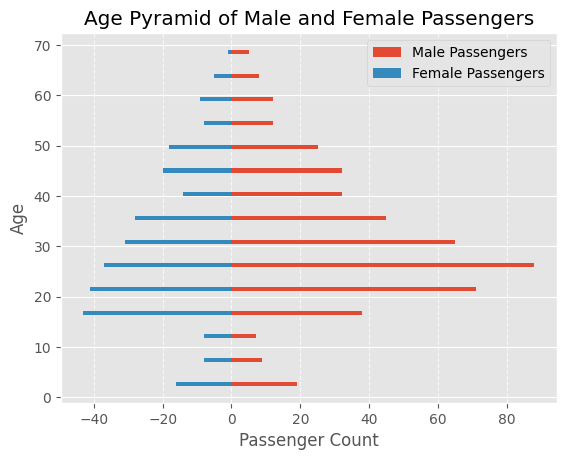

In [20]:
import numpy as np

# Calculate histogram counts for both sexes
male_counts, bins = np.histogram(df[df['sex'] == 'male'].age, bins=15)
female_counts, _ = np.histogram(df[df['sex'] == 'female'].age, bins=bins)

# Use the bin edges to determine the center positions
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Plot the males on the right (positive) and the females on the left (negative)
plt.barh(bin_centers, male_counts, align='center', label='Male Passengers')
plt.barh(bin_centers, -female_counts, align='center', label='Female Passengers', color='C1')  # Negative for left side

# Add labels, legend, and make it look symmetrical
plt.legend()
plt.xlabel('Passenger Count')
plt.ylabel('Age')
plt.title('Age Pyramid of Male and Female Passengers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


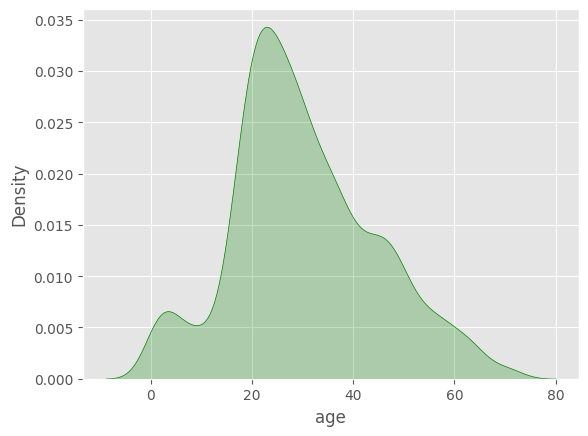

In [24]:
import seaborn as sns
sns.kdeplot(df.age ,color='green',fill=True, bw_adjust= 0.8);

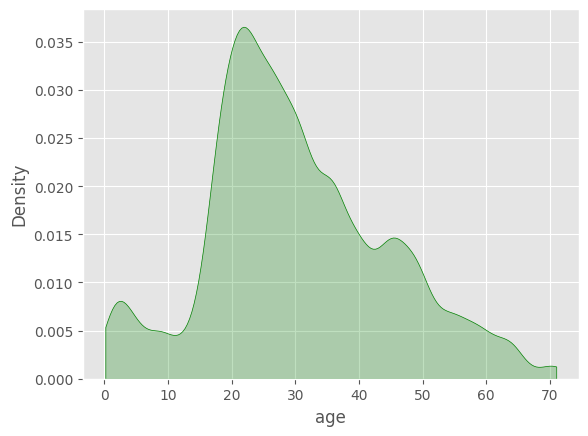

In [25]:
sns.kdeplot(df.age ,color='green',fill=True, bw_adjust= 0.5, cut= 0);

- cut=0: The KDE is limited to the range of the data (no extension).
- cut=1: The KDE extends by one bandwidth beyond the data range on each side.
- cut=2 (the default): The KDE extends by two bandwidths beyond the data range on each side.

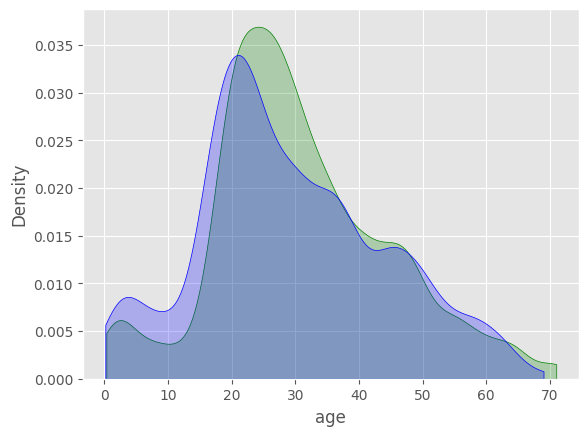

In [28]:
sns.kdeplot(df[df['sex']=='male'].age ,color='green',fill=True, bw_adjust= 0.6, cut = 0)
sns.kdeplot(df[df['sex']=='female'].age ,color='blue',fill=True, bw_adjust= 0.6, cut = 0);

<Axes: xlabel='age', ylabel='Density'>

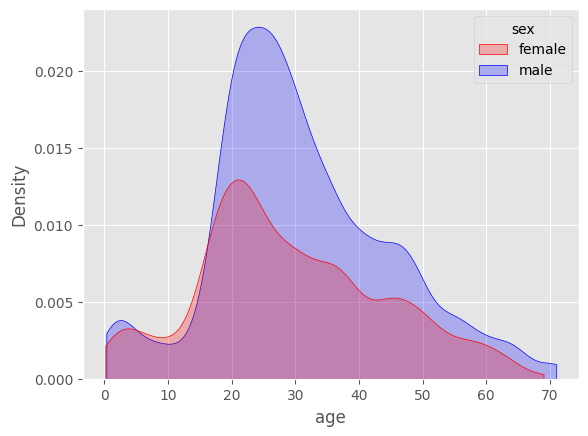

In [78]:
sns.kdeplot(data=df, x='age', hue='sex', palette={'male': 'blue', 'female': 'red'}, fill=True, bw_adjust= 0.6, cut = 0)

<Axes: xlabel='age', ylabel='Density'>

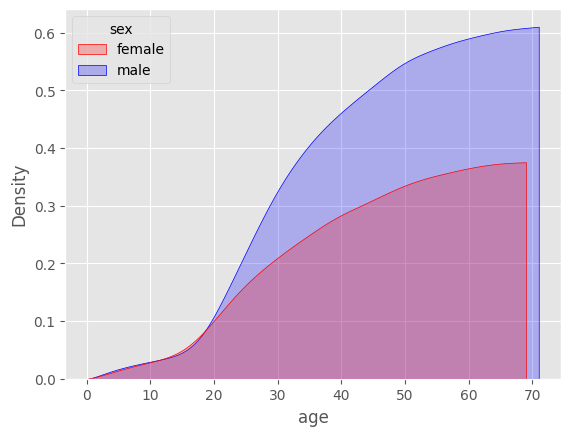

In [80]:
sns.kdeplot(data=df, x='age', hue='sex', palette={'male': 'blue', 'female': 'red'}, fill=True, bw_adjust= 0.6, cut = 0, cumulative = True)

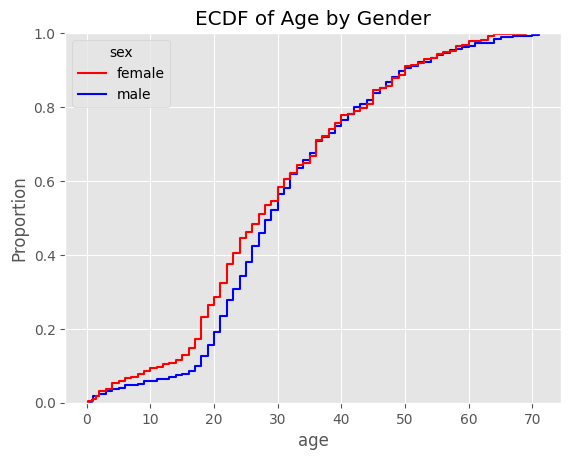

In [33]:
sns.ecdfplot(data=df, x='age', hue='sex', palette={'male': 'blue', 'female': 'red'})

# Add labels and title
plt.title('ECDF of Age by Gender')
plt.show()

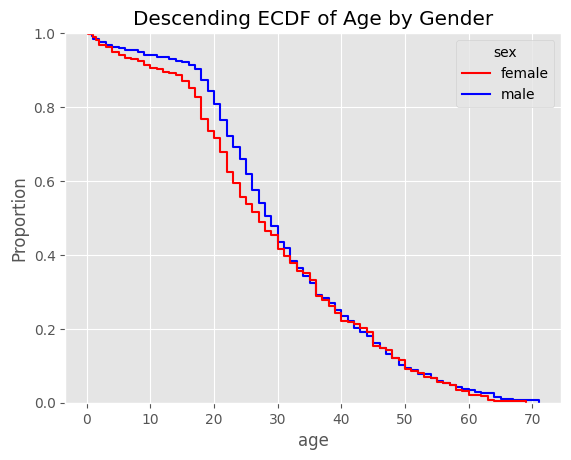

In [35]:
# ECDF plot
sns.ecdfplot(data=df, x='age', hue='sex', palette={'male': 'blue', 'female': 'red'},complementary=True)

# Add labels and title
plt.title('Descending ECDF of Age by Gender')
plt.show()

In [37]:
#pip install seaborn-qqplot

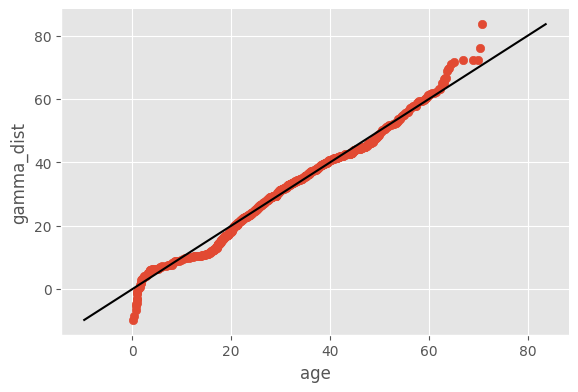

In [39]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.pplot(data=df, x="age", y=gamma, kind='qq', height=4, aspect=1.5, display_kws={"identity":True});

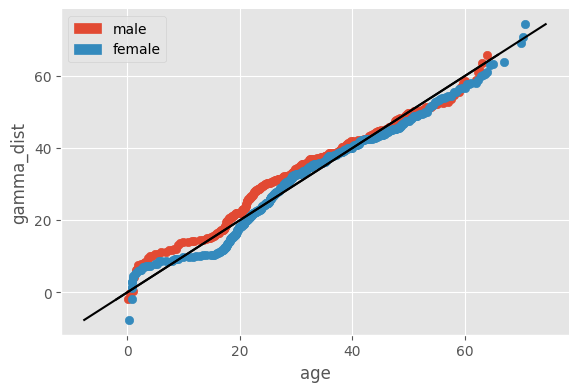

In [41]:

sqp.pplot(data=df, x="age", y=gamma, kind='qq',hue= 'sex', height=4, aspect=1.5, display_kws={"identity":True});

In [49]:
wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 192
Data columns (total 47 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Continent                                                                                                                        166 non-null    object 
 1   Country                                                                                                                          166 non-null    object 
 2   Primary completion rate: Male: % of relevant age group: 2015                                                                     136 non-null    float64
 3   Primary completion rate: Female: % of relevant age group: 2015                                           

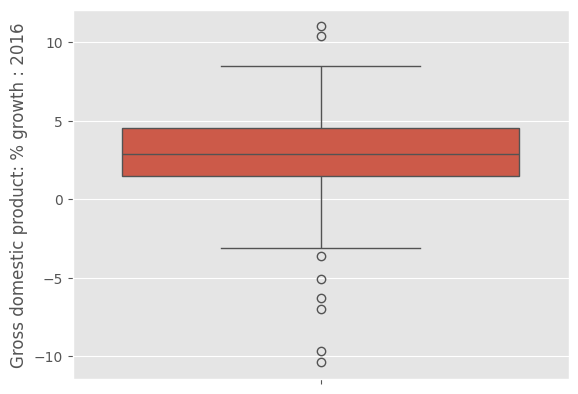

In [59]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016');

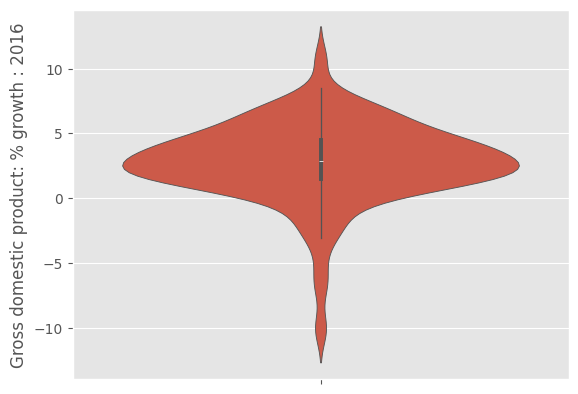

In [61]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016');

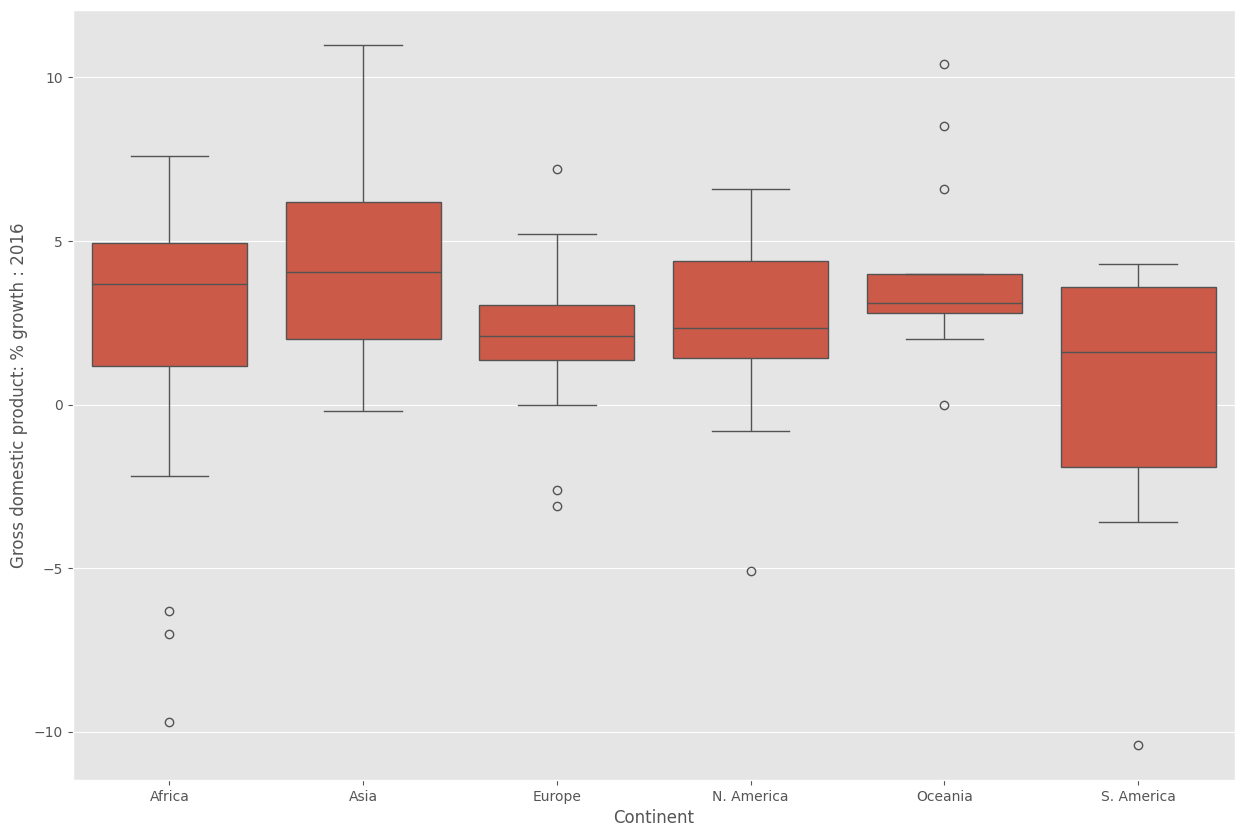

In [73]:
plt.figure (figsize= (15,10))
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

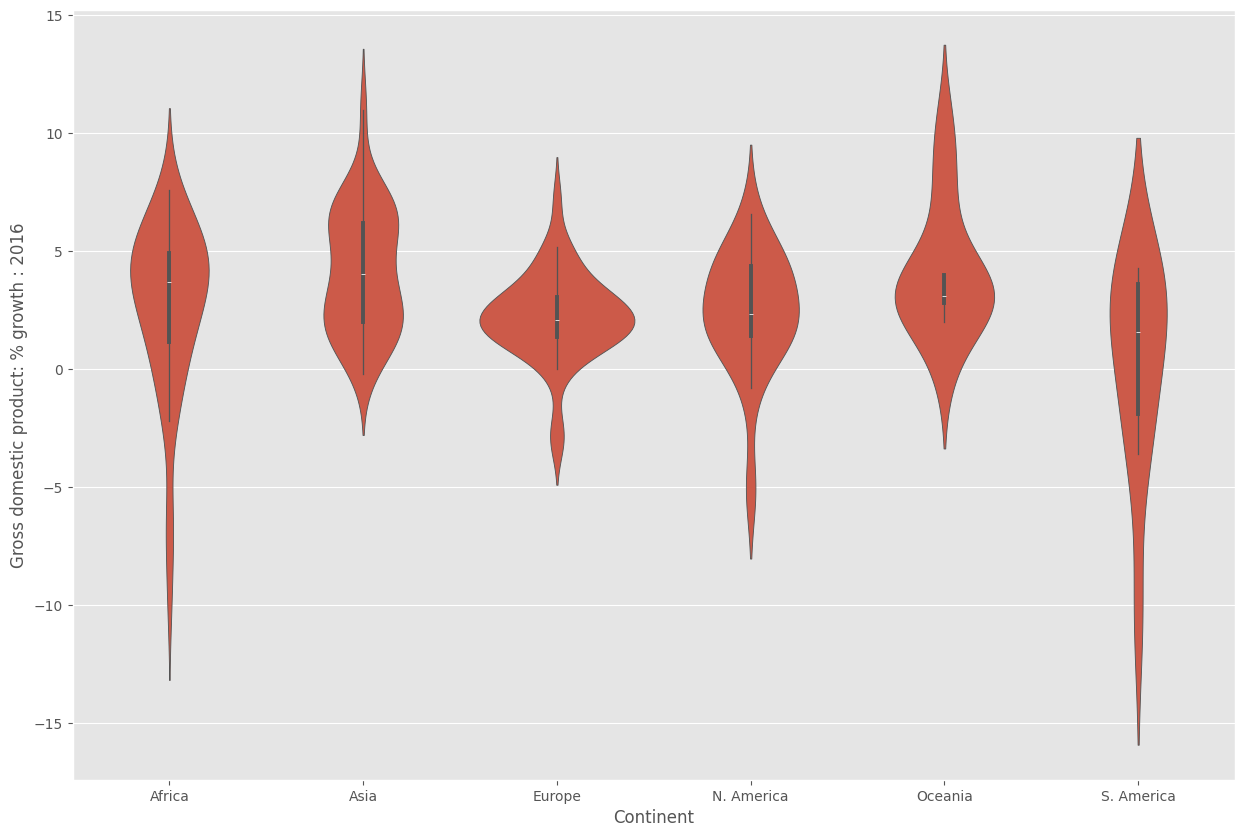

In [85]:
plt.figure (figsize= (15,10))
sns.violinplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

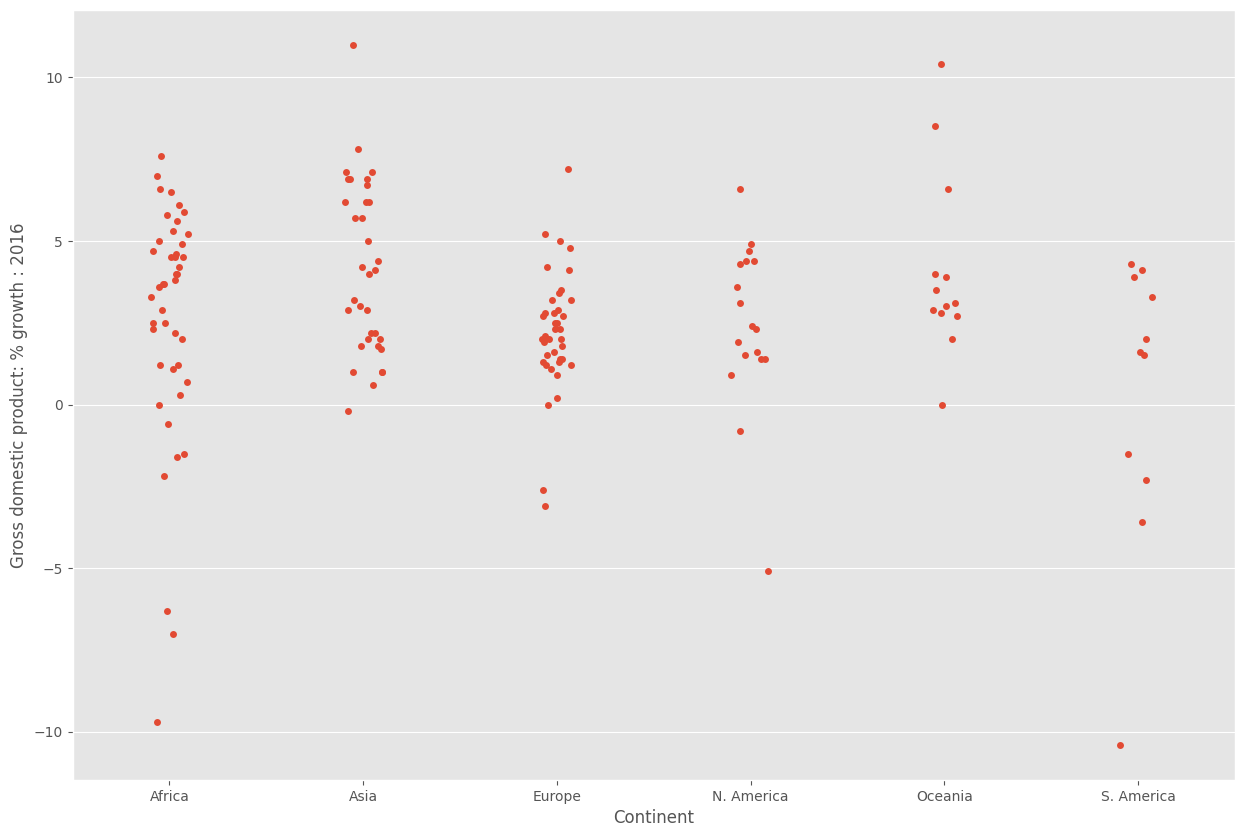

In [87]:
plt.figure (figsize= (15,10))
sns.stripplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

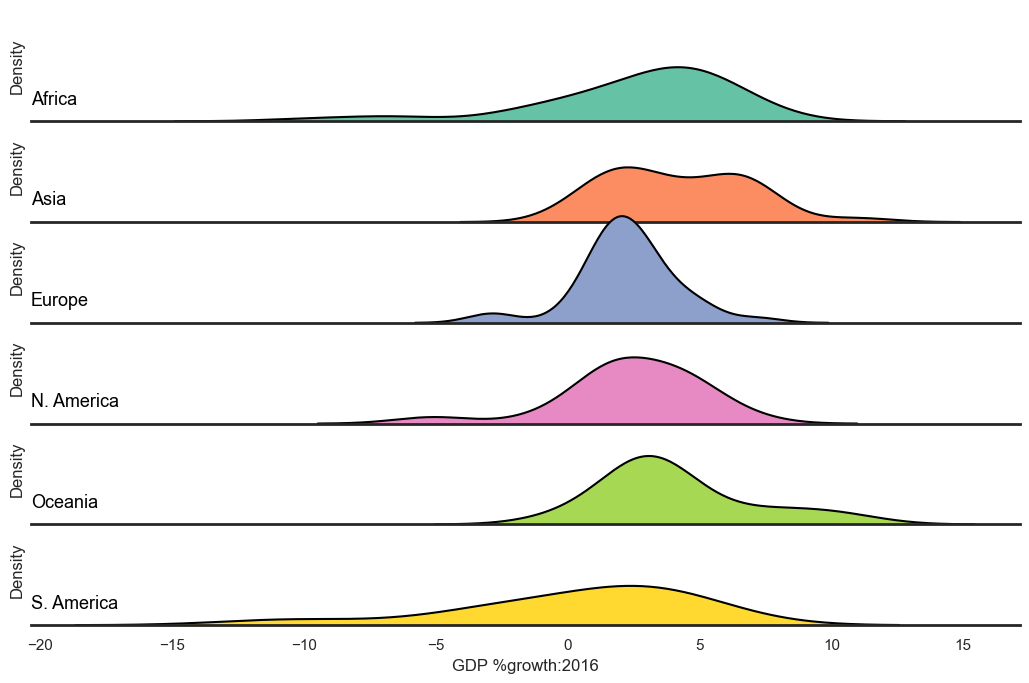

In [111]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(data=wb, palette=palette, row="Continent", hue="Continent", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot,x='Gross domestic product: % growth : 2016', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot,x='Gross domestic product: % growth : 2016', color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Continent")
g.fig.subplots_adjust(hspace=-.1)
g.set_titles("")
g.set(yticks=[], xlabel="GDP %growth:2016")
g.despine( left=True)